In [1]:
import pandas as pd

In [2]:
QA_file_path='YOUR PATH HERE'

In [3]:
QA_dataframe=pd.read_csv(QA_file_path,
                         sep='\t')

In [4]:
QA_dataframe['QuestionText']

0                     Скажите по-японски "короткая песня".
1        Если вы вспомните историю Германии, то, возмож...
2        ЭТОТ тип письма в переводе с греческого означа...
3        В школе вам ставили оценки за поведение. А как...
4        Относительно своего отца ОН действительно "сра...
                               ...                        
29371    В ответе слово немецкого происхождения. ИХ час...
29372    Международная шкала горечи была придумана для ...
29373    Благодаря группе, возглавляемой Михаилом Кольц...
29374    Название ЭТОГО ВЕЩЕСТВА, известного также как ...
29375    У немцев принято вшивать горчичное семечко В Э...
Name: QuestionText, Length: 29376, dtype: object

In [6]:
!pip install spacy==3.2

     |████████████████████████████████| 6.0 MB 4.5 MB/s 
     |████████████████████████████████| 10.1 MB 31.8 MB/s 
     |████████████████████████████████| 653 kB 40.6 MB/s 
     |████████████████████████████████| 451 kB 57.6 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 181 kB 75.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [6]:
import spacy

In [7]:
!python -m spacy download ru_core_news_lg

     |████████████████████████████████| 514.5 MB 11 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


In [8]:
nlp = spacy.load("ru_core_news_lg")

In [9]:
df_to_string=' '.join(QA_dataframe['QuestionText'][:1000])

In [10]:
all_quests=nlp(df_to_string)

In [12]:
from collections import Counter

In [33]:
only_proper_nouns=[a.lemma_ for a in all_quests if a.pos_ == "PROPN" and len(a.text)>2 and '.' not in a.text and not a.lemma_.startswith('эт')]

In [ ]:
only_proper_nouns

In [30]:
from wordcloud import WordCloud

In [35]:
wordcloud = WordCloud().generate(' '.join(only_proper_nouns))

(-0.5, 399.5, 199.5, -0.5)

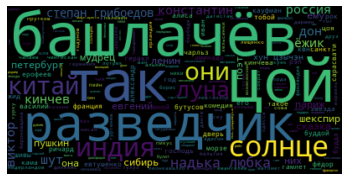

In [36]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")